In [6]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import datetime

In [29]:
plt.rcParams.update({'font.size': 14, "font.family": "Times New Roman"})

In [30]:
t1 = datetime.datetime.fromisoformat("2020-01-22 11:04:35")
t2 = datetime.datetime.fromisoformat("2020-01-24 10:05:35")
t3 = datetime.datetime.fromisoformat("2020-01-24 11:05:35")
(t2 - t1) / (t3 - t1)

0.9791738979521

In [7]:
xticks = [
    datetime.datetime(year=2020, month=1, day=d)
    for d in [9, 21, 25, 29]
] + [
    datetime.datetime(year=2020, month=2, day=1)
]

xticks_str = [
    d.strftime("%Y-%m-%d")
    for d in xticks
]

In [3]:
def read_log(path):
    with open(path, "r") as f:
        lines = f.readlines()

    runtimes = {
        "time": [],
        "runtime": [],
        # "timestep": []
    }

    for i, line in enumerate(lines):
        runtime, time_str = line.split(",")
        runtime = float(runtime)
        time_obj = datetime.datetime.fromisoformat(time_str.strip())

        for j in range(len(xticks) - 1):
            if xticks[j] <= time_obj < xticks[j + 1]:
                timestep = j + (time_obj - xticks[j]) / (xticks[j + 1] - xticks[j])
                break
        
        runtimes["time"].append(time_obj)
        runtimes["runtime"].append(runtime)
        # runtimes["timestep"].append(timestep)

    return runtimes

In [20]:
log_files = []
labels = dict()
colors = dict()
markers = dict()

for year, month in [(2018, 10), (2019, 1), (2019, 4), (2019, 7)]:
    log_files.extend([
        f"../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_true-{year}-{month}.txt",
        f"../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_false-{year}-{month}.txt",
        f"../logs/related_works/enclosing1998/city_Lousiville_escooter_trip_start_streaming_K10-{year}-{month}.txt",
        f"../logs/related_works/smallest2019/city_Lousiville_escooter_trip_start_streaming_K10-{year}-{month}.txt",
    ])

    labels.update({
        f"../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_true-{year}-{month}.txt": "ours (w caching)",
        f"../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_false-{year}-{month}.txt": "ours (w/o caching)",
        f"../logs/related_works/enclosing1998/city_Lousiville_escooter_trip_start_streaming_K10-{year}-{month}.txt": "enclosing1998",
        f"../logs/related_works/smallest2019/city_Lousiville_escooter_trip_start_streaming_K10-{year}-{month}.txt": "smallest2019",
    })

    colors.update({
        f"../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_true-{year}-{month}.txt": "orange",
        f"../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_false-{year}-{month}.txt": "blue",
        f"../logs/related_works/enclosing1998/city_Lousiville_escooter_trip_start_streaming_K10-{year}-{month}.txt": "green",
        f"../logs/related_works/smallest2019/city_Lousiville_escooter_trip_start_streaming_K10-{year}-{month}.txt": "red",
    })

    markers.update({
        f"../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_true-{year}-{month}.txt": "o",
        f"../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_false-{year}-{month}.txt": "*",
        f"../logs/related_works/enclosing1998/city_Lousiville_escooter_trip_start_streaming_K10-{year}-{month}.txt": "s",
        f"../logs/related_works/smallest2019/city_Lousiville_escooter_trip_start_streaming_K10-{year}-{month}.txt": "^",
    })

In [31]:
runtimes = {
    path: read_log(path)
    for path in log_files
}

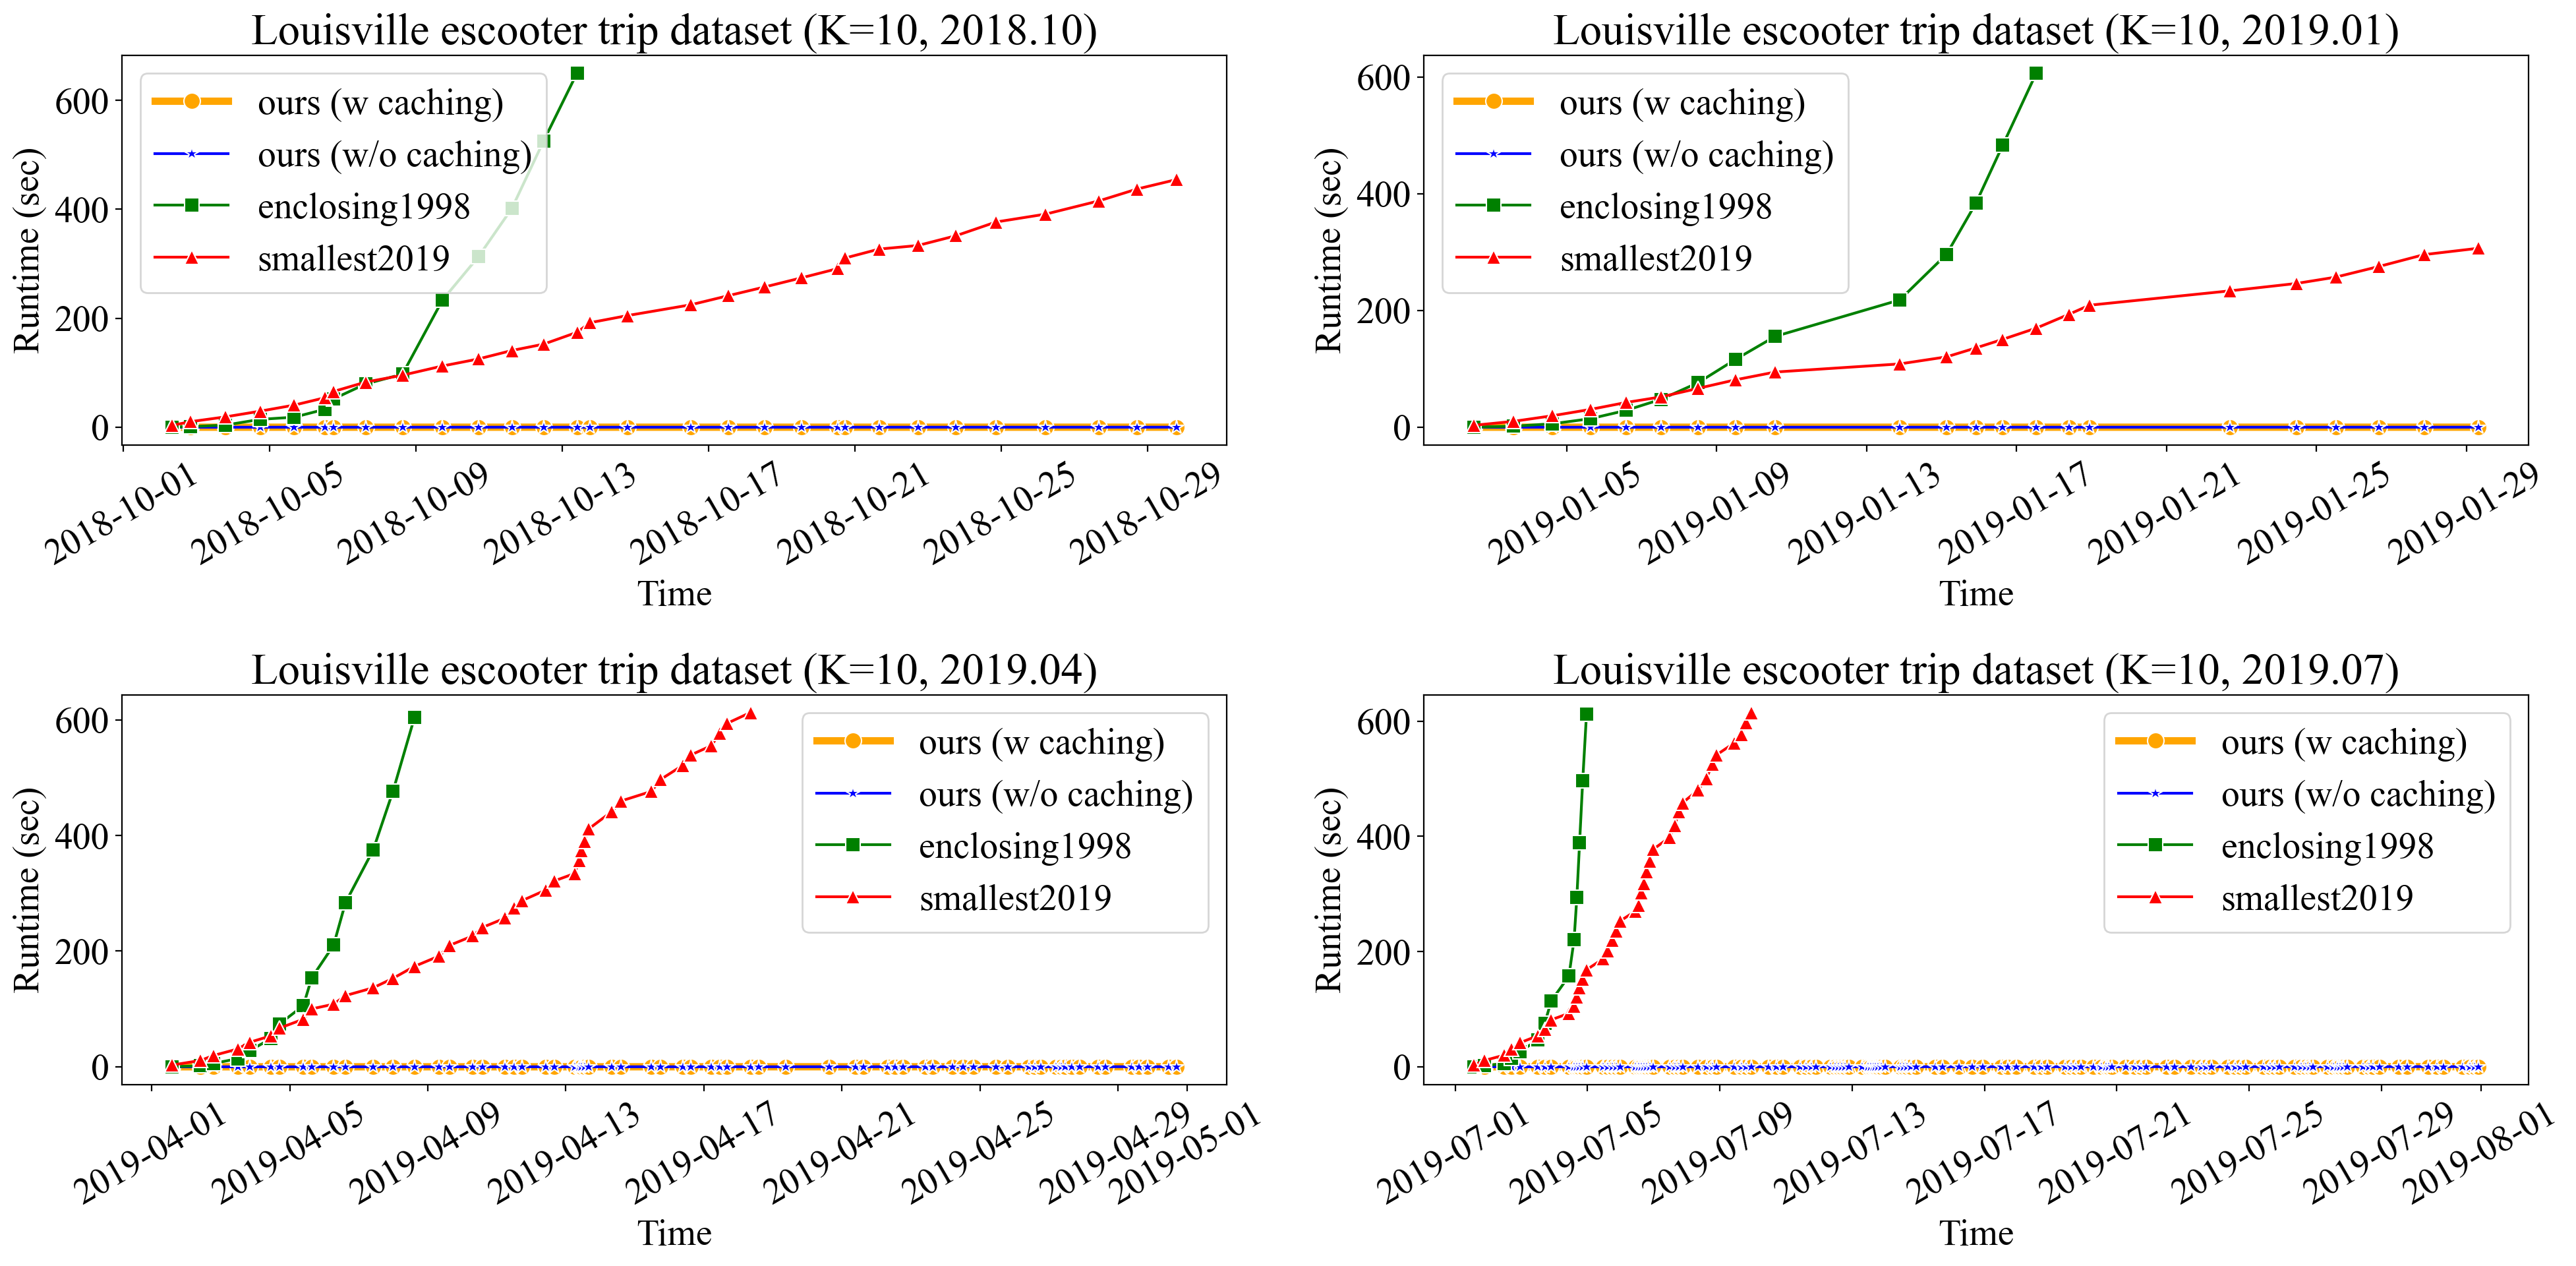

In [38]:
plt.rcParams.update({'font.size': 20, "font.family": "Times New Roman"})
plt.figure(figsize=(20, 10), dpi=200)

for i, (year, month) in enumerate([(2018, 10), (2019, 1), (2019, 4), (2019, 7)]):
    plt.subplot(2, 2, i + 1)
    our_name_w_caching = f"../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_true-{year}-{month}.txt"
    our_name_wo_caching = f"../logs/ours/city_Lousiville_escooter_trip_start_streaming_K10_cache_false-{year}-{month}.txt"
    name_enclosing1998 = f"../logs/related_works/enclosing1998/city_Lousiville_escooter_trip_start_streaming_K10-{year}-{month}.txt"
    name_smallest2019 = f"../logs/related_works/smallest2019/city_Lousiville_escooter_trip_start_streaming_K10-{year}-{month}.txt"

    sns.lineplot(data=runtimes[our_name_w_caching], x="time", y="runtime", label=labels[our_name_w_caching], marker=markers[our_name_w_caching], ms=9, linestyle="-", color=colors[our_name_w_caching], lw=4)
    sns.lineplot(data=runtimes[our_name_wo_caching], x="time", y="runtime", label=labels[our_name_wo_caching], marker=markers[our_name_wo_caching], ms=8, linestyle="-", color=colors[our_name_wo_caching])
    sns.lineplot(data=runtimes[name_enclosing1998], x="time", y="runtime", label=labels[name_enclosing1998], marker=markers[name_enclosing1998], ms=8, linestyle="-", color=colors[name_enclosing1998])
    sns.lineplot(data=runtimes[name_smallest2019], x="time", y="runtime", label=labels[name_smallest2019], marker=markers[name_smallest2019], ms=8, linestyle="-", color=colors[name_smallest2019])

    plt.legend()
    plt.xlabel("Time")

    plt.xticks(None, None, rotation=30)
    plt.ylabel("Runtime (sec)")
    plt.title(f"Louisville escooter trip dataset (K=10, {year}.{month:02d})")

plt.tight_layout()
plt.savefig("runtime_comparison_escooter_time_axis3.png")
plt.show()